In [1]:
from pathlib import Path
from datetime import datetime, time, date
from typing import Optional, Union
import geopandas as gpd
import pandas as pd
import polars as pl

from datetime import datetime

In [2]:
from pyGTFSHandler import Feed

In [3]:
#feed_path = "/home/miguel/Documents/Proyectos/PTLevelofService/gtfs/pyGTFSHandler/examples/transportes_urbanos_de_vitoria_tuvisa"
feed_path = "/home/jshz/Documents/pyGTFSHandler/examples/MetroDeMadrid"

In [5]:
gtfs = Feed(
    feed_path,
    start_date=datetime(month=9,year=2025,day=1),
    end_date=datetime(month=12,year=2025,day=1),
    #start_time=time(hour=0),
    #end_time=time(hour=6),
    # stop_group_distance=100,
)

In [6]:
gtfs.calendar.get_services_in_date(datetime(year=2025,month=12,day=30))
#gtfs.calendar.get_services_in_date(datetime(year=2025,month=3,day=17))

['4_I14', '4_I14_night']

In [7]:
gtfs.calendar.get_services_in_date_range()#datetime(year=2025,month=10,day=1),datetime(year=2025,month=10,day=31))

date,weekday,service_ids
date,str,list[str]
2025-09-01,"""monday""","[""4_I13_night"", ""4_I14""]"
2025-09-02,"""tuesday""","[""4_I14"", ""4_I14_night""]"
2025-09-03,"""wednesday""","[""4_I14"", ""4_I14_night""]"
2025-09-04,"""thursday""","[""4_I14"", ""4_I14_night""]"
2025-09-05,"""friday""","[""4_I14_night"", ""4_I15""]"
…,…,…
2025-11-27,"""thursday""","[""4_I14"", ""4_I14_night""]"
2025-11-28,"""friday""","[""4_I14_night"", ""4_I15""]"
2025-11-29,"""saturday""","[""4_I12"", ""4_I15_night""]"


In [8]:
service_intensity_df = gtfs.get_service_intensity_in_date_range()#datetime(year=2025,month=3,day=26),datetime(year=2025,month=3,day=30))
service_intensity_df

/home/jshz/Documents/pyGTFSHandler/pyGTFSHandler/utils.py:294: UserWarning: Fuzzy match used for region 'Comunidad de Madrid'. Matched with 'Madrid, Comunidad de'.
  warnings.warn(


date,weekday,service_intensity,weekend,holiday
date,str,u32,bool,bool
2025-09-01,"""monday""",544938,false,false
2025-09-02,"""tuesday""",544938,false,false
2025-09-03,"""wednesday""",544938,false,false
2025-09-04,"""thursday""",544938,false,false
2025-09-05,"""friday""",567999,false,false
…,…,…,…,…
2025-11-27,"""thursday""",544938,false,false
2025-11-28,"""friday""",567999,false,false
2025-11-29,"""saturday""",297368,true,false


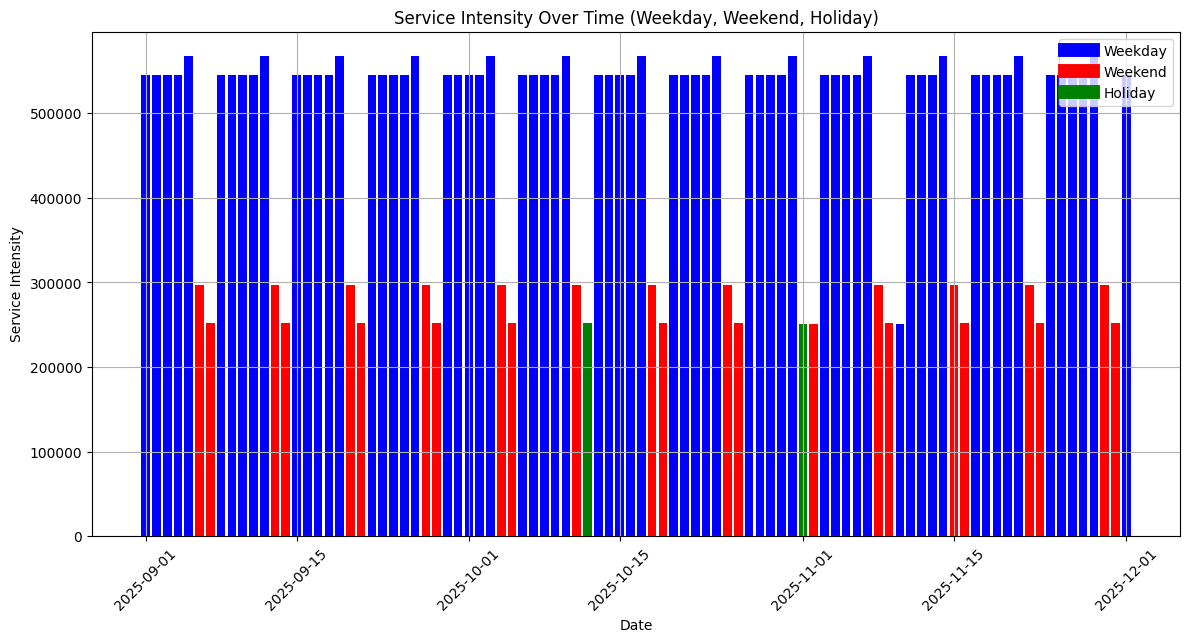

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to pandas and parse dates
pdf = service_intensity_df.to_pandas()
pdf["date"] = pd.to_datetime(pdf["date"])

plt.figure(figsize=(12, 6))
bar_width = 0.8

# Plot each date individually, coloring by type based on holiday/weekend flags
for _, row in pdf.iterrows():
    date = row["date"]
    value = row["service_intensity"]

    if row["holiday"]:
        color = "green"
        label = "Holiday"
    elif row["weekend"]:
        color = "red"
        label = "Weekend"
    else:
        color = "blue"
        label = "Weekday"

    plt.bar(date, value, width=bar_width, color=color, align="center")

# Avoid duplicate legend entries
handles = [
    plt.Line2D([], [], color="blue", label="Weekday", linewidth=10),
    plt.Line2D([], [], color="red", label="Weekend", linewidth=10),
    plt.Line2D([], [], color="green", label="Holiday", linewidth=10),
]
plt.legend(handles=handles)

plt.xlabel("Date")
plt.ylabel("Service Intensity")
plt.title("Service Intensity Over Time (Weekday, Weekend, Holiday)")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [10]:
stop_quality = gtfs.get_mean_intervall_at_stops(
    date=datetime(year=2025, month=9, day=30),
    start_time=time(hour=8),
    end_time=time(hour=20),
    method='agg',
    on='stop_id'
)

In [11]:
on = 'stop_id'
stops_gdf = gtfs.stops.gdf.merge(stop_quality.select(on,"mean_interval","route_ids","shape_directions").to_pandas(),on=on,how="left")
m = stops_gdf.explore(
    column="mean_interval",
    cmap="RdYlGn_r",
    vmin=60,
    vmax=3600/4,
    style_kwds={
        'opacity': 1.0,      # Line/border opacity (1.0 is 100%)
        'weight': 6,         # Line thickness in pixels
    }
)
m

# stop_groups_gdf = (
#     gtfs.stops.gdf
#     # .groupby("parent_station")
#     .agg({
#         "geometry": lambda x: x.union_all().centroid,
#         "stop_id": list
#     })
#     .reset_index()
# ).set_geometry("geometry")
# stop_groups_gdf.crs = 4326

# stop_groups_gdf = stop_groups_gdf.to_crs(stop_groups_gdf.estimate_utm_crs()).buffer(100).boundary.to_crs(4326)

# stop_groups_gdf.explore(m=m,color='black')

In [16]:
gtfs.routes.lf.filter(pl.col("route_id") == "867").collect()

route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,gtfs_name
str,str,str,str,str,i64,str,str,str,str
"""867""","""EMT""","""SE6""","""Ciudad_Universitaria_-_Mendez_…",null,3,"""https://www.emtmadrid.es/EMTBU…","""0178BC""","""FFFFFF""","""EMTMadrid"""


In [7]:
gtfs.stops.gdf.explore()

In [18]:
stops_gdf = (
    gtfs.stops.gdf
    .groupby("parent_station")
    .agg({
        "geometry": lambda x: x.union_all().centroid,
        "stop_id": list
    })
    .reset_index()
)
stops_gdf

,parent_station,geometry,stop_id
0,1,POINT (-3.78249 40.46998),"[1, 8]"
1,1000,POINT (-3.66993 40.39833),"[1000, 2058, 3662, 5860]"
2,1001,POINT (-3.66622 40.39676),"[1001, 1002]"
3,1003,POINT (-3.66332 40.39523),"[1003, 1004]"
4,1005,POINT (-3.66089 40.394),"[1005, 1006]"
...,...,...,...
2614,989,POINT (-3.61886 40.4398),"[989, 5155]"
2615,99,POINT (-3.6857 40.45749),"[99, 100]"
2616,990,POINT (-3.61538 40.44123),"[990, 991, 1133, 4426, 5998]"
2617,993,POINT (-3.61211 40.44195),"[993, 4046]"


In [44]:
2983/3600

0.8286111111111111

In [21]:
gtfs.lf.filter(pl.col("route_id") == "016").collect().filter(pl.col("service_id") == "FE").filter(pl.col("departure_time") > 23.5*3600)

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""FE01600126_3000""","""1728""",85800,85800,0,0,1800,null,null,null,1,"""FE""","""016""","""FE01600110""","""1728""",3,0.0,6928.344328,200.0
"""FE01600126_3000""","""118""",85885,85885,1,85,1800,null,null,null,1,"""FE""","""016""","""FE01600110""","""118""",3,308.237535,6928.344328,210.0
"""FE01600126_3000""","""116""",85988,85988,2,188,1800,null,null,null,1,"""FE""","""016""","""FE01600110""","""116""",3,728.530115,6928.344328,210.0
"""FE01600126_3000""","""114""",86060,86060,3,260,1800,null,null,null,1,"""FE""","""016""","""FE01600110""","""114""",3,1022.590229,6928.344328,210.0
"""FE01600126_3000""","""111""",86108,86108,4,308,1800,null,null,null,1,"""FE""","""016""","""FE01600110""","""111""",3,1219.305149,6928.344328,210.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""FE01600127_1500""","""115""",87548,87548,25,1448,1798,null,null,null,1,"""FE""","""016""","""FE01600127""","""115""",3,5954.725413,7069.181347,10.0
"""FE01600127_1500""","""117""",87622,87622,26,1522,1798,null,null,null,1,"""FE""","""016""","""FE01600127""","""117""",3,6295.006578,7069.181347,10.0
"""FE01600127_1500""","""119""",87696,87696,27,1596,1798,null,null,null,1,"""FE""","""016""","""FE01600127""","""119""",3,6637.114042,7069.181347,360.0


In [20]:
86100/3600

23.916666666666668

In [17]:
stop_quality.filter(pl.col("stop_id") == "6228").explode("departure_times")

stop_id,mean_interval,shape_directions,shape_ids,departure_times,route_ids
str,f64,list[f64],list[str],i64,list[str]
"""6228""",51174.0,[290.0],"[""FE1630012""]",26418,"[""163""]"
"""6228""",51174.0,[290.0],"[""FE1630012""]",28098,"[""163""]"
"""6228""",51174.0,[290.0],"[""FE1630012""]",29778,"[""163""]"


In [4]:
gtfs.lf.filter(pl.col("stop_id") == "6228").collect()

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""FE1630012""","""6228""",28098,28098,12,1098,1501,25200,28799,1680,3,"""FE""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""FE1630014""","""6228""",31698,31698,12,1098,1501,28800,82799,1800,30,"""FE""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""LA1630012""","""6228""",28098,28098,12,1098,1501,25200,28799,1680,3,"""LA""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""LA1630014""","""6228""",31698,31698,12,1098,1501,28800,82799,1800,30,"""LA""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""SA1630012""","""6228""",28098,28098,12,1098,1501,25200,28799,1680,3,"""SA""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""SA1630014""","""6228""",31698,31698,12,1098,1501,28800,82799,1800,30,"""SA""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0


In [12]:
gtfs._frequencies_to_stop_times(gtfs.lf.filter(pl.col("stop_id") == "6228")).collect()

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,null,null,null,i32,str,str,str,str,i64,f64,f64,f64
"""FE1630012""","""6228""",26418,26418,12,1098,1501,null,null,null,1,"""FE""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""FE1630012""","""6228""",28098,28098,12,1098,1501,null,null,null,1,"""FE""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""FE1630012""","""6228""",29778,29778,12,1098,1501,null,null,null,1,"""FE""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""FE1630014""","""6228""",29898,29898,12,1098,1501,null,null,null,1,"""FE""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""FE1630014""","""6228""",31698,31698,12,1098,1501,null,null,null,1,"""FE""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""SA1630014""","""6228""",74898,74898,12,1098,1501,null,null,null,1,"""SA""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""SA1630014""","""6228""",76698,76698,12,1098,1501,null,null,null,1,"""SA""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""SA1630014""","""6228""",78498,78498,12,1098,1501,null,null,null,1,"""SA""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0


In [10]:
gtfs.lf.filter(pl.col("stop_id") == "6228").collect()

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""FE1630012""","""6228""",28098,28098,12,1098,1501,25200,28799,1680,3,"""FE""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""FE1630014""","""6228""",31698,31698,12,1098,1501,28800,82799,1800,30,"""FE""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""LA1630012""","""6228""",28098,28098,12,1098,1501,25200,28799,1680,3,"""LA""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""LA1630014""","""6228""",31698,31698,12,1098,1501,28800,82799,1800,30,"""LA""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""SA1630012""","""6228""",28098,28098,12,1098,1501,25200,28799,1680,3,"""SA""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0
"""SA1630014""","""6228""",31698,31698,12,1098,1501,28800,82799,1800,30,"""SA""","""163""","""FE1630012""","""6228""",3,5469.734748,5874.015905,290.0


In [22]:
780/60

13.0

In [30]:
(0**2*(6-3)+3**2)/6

1.5

In [10]:
stop_quality.filter(pl.col("stop_id") == "4273")

stop_id,mean_interval,shape_directions,shape_ids,departure_times,route_ids
str,f64,list[f64],list[str],list[i64],list[str]


In [9]:
gtfs.lf.collect().unique(["stop_id","departure_time"]).group_by("service_id").agg(pl.col("n_trips").sum()).filter(pl.col("service_id") == "Laborables_2025-03-11")

service_id,n_trips
str,u32


In [23]:
gtfs.lf.collect().filter(pl.col("n_trips") > 1)

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,bool,bool,u32,str,str,str,str,i64,f64,f64,f64


In [13]:
(24589-22789)/60

30.0

In [17]:
1181/60

19.683333333333334

In [12]:
gtfs.stops.gdf[gtfs.stops.gdf['stop_id'] == '4273'].explore()

In [10]:
stop_quality.filter(pl.col("stop_id") == '4273').explode("departure_times").sort("departure_times")

NameError: name 'stop_quality' is not defined

In [8]:
gtfs.lf.collect().filter((pl.col("stop_id") == '4273') & (pl.col("route_id") == "170") & (pl.col("service_id") == "LA")).sort("departure_time")#"trip_id","stop_sequence")

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""LA1700012""","""4273""",26951,26951,26,2651,3063,21600,25199,840,4,"""LA""","""170""","""LA17000110""","""4273""",3,9871.85391,11334.059118,60.0
"""LA1700033""","""4273""",30532,30532,26,2752,3181,25200,28799,720,4,"""LA""","""170""","""LA17000110""","""4273""",3,9871.85391,11334.059118,60.0
"""LA1700014""","""4273""",33412,33412,26,2752,3181,28800,35999,780,9,"""LA""","""170""","""LA17000110""","""4273""",3,9871.85391,11334.059118,60.0
"""LA1700016""","""4273""",39641,39641,26,2441,2821,36000,46799,840,12,"""LA""","""170""","""FE17000114""","""4273""",3,9871.85391,11334.059118,60.0
"""LA17000110""","""4273""",51652,51652,26,2752,3181,46800,50399,780,4,"""LA""","""170""","""LA17000110""","""4273""",3,9871.85391,11334.059118,60.0
"""LA17000112""","""4273""",57952,57952,26,2752,3181,50400,64799,720,19,"""LA""","""170""","""LA17000110""","""4273""",3,9871.85391,11334.059118,60.0
"""LA17000116""","""4273""",70972,70972,26,2752,3181,64800,68399,780,4,"""LA""","""170""","""LA17000110""","""4273""",3,9871.85391,11334.059118,60.0
"""LA17000212""","""4273""",71760,71760,26,2700,3121,68400,71999,840,4,"""LA""","""170""","""LA17000110""","""4273""",3,9871.85391,11334.059118,60.0
"""LA17000118""","""4273""",76901,76901,26,2441,2821,72000,79199,900,7,"""LA""","""170""","""FE17000114""","""4273""",3,9871.85391,11334.059118,60.0


In [24]:
gtfs.lf.collect().filter((pl.col("trip_id").is_in(['LA1700011']))).sort("departure_time").with_columns(
    pl.col("departure_time") / 3600
)

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,f64,i64,i64,i64,i64,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""LA1700011""","""5170""",6.0,21600,0,0,2696,21600,25199,840,4,"""LA""","""170""","""FE17000111""","""5170""",3,0.0,11891.59178,170.0
"""LA1700011""","""5169""",6.020833,21675,1,75,2696,21600,25199,840,4,"""LA""","""170""","""FE17000111""","""5169""",3,261.70325,11891.59178,170.0
"""LA1700011""","""5174""",6.037778,21736,2,136,2696,21600,25199,840,4,"""LA""","""170""","""FE17000111""","""5174""",3,573.02998,11891.59178,170.0
"""LA1700011""","""5176""",6.0525,21789,3,189,2696,21600,25199,840,4,"""LA""","""170""","""FE17000111""","""5176""",3,794.530444,11891.59178,170.0
"""LA1700011""","""4405""",6.067778,21844,4,244,2696,21600,25199,840,4,"""LA""","""170""","""FE17000111""","""4405""",3,1066.82193,11891.59178,170.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""LA1700011""","""4220""",6.6825,24057,28,2457,2696,21600,25199,840,4,"""LA""","""170""","""FE17000111""","""4220""",3,10884.902812,11891.59178,190.0
"""LA1700011""","""4221""",6.704167,24135,29,2535,2696,21600,25199,840,4,"""LA""","""170""","""FE17000111""","""4221""",3,11198.110652,11891.59178,260.0
"""LA1700011""","""5397""",6.723611,24205,30,2605,2696,21600,25199,840,4,"""LA""","""170""","""FE17000111""","""5397""",3,11504.412045,11891.59178,150.0


In [25]:
2696/60

44.93333333333333

In [21]:
gtfs.lf.collect().filter((pl.col("trip_id").is_in(['LA1700041']))).sort("departure_time")

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,bool,bool,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""LA1700041""","""5170""",23400,23400,0,0,3001,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700011""","""5170""",3,0.0,11891.59178,170.0
"""LA1700041""","""5169""",23484,23484,1,84,3001,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700011""","""5169""",3,261.70325,11891.59178,170.0
"""LA1700041""","""5174""",23551,23551,2,151,3001,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700011""","""5174""",3,573.02998,11891.59178,170.0
"""LA1700041""","""5176""",23610,23610,3,210,3001,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700011""","""5176""",3,794.530444,11891.59178,170.0
"""LA1700041""","""4405""",23671,23671,4,271,3001,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700011""","""4405""",3,1066.82193,11891.59178,170.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""LA1700041""","""4220""",26134,26134,28,2734,3001,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700011""","""4220""",3,10884.902812,11891.59178,190.0
"""LA1700041""","""4221""",26221,26221,29,2821,3001,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700011""","""4221""",3,11198.110652,11891.59178,260.0
"""LA1700041""","""5397""",26299,26299,30,2899,3001,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700011""","""5397""",3,11504.412045,11891.59178,150.0


In [22]:
23400-22500

900

In [19]:
gtfs.lf.collect().filter((pl.col("trip_id").is_in(['LA1700021']))).sort("departure_time")

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,bool,bool,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""LA1700021""","""5170""",22500,22500,0,0,2520,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700013""","""5170""",3,0.0,11891.59178,170.0
"""LA1700021""","""5169""",22570,22570,1,70,2520,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700013""","""5169""",3,261.70325,11891.59178,170.0
"""LA1700021""","""5174""",22627,22627,2,127,2520,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700013""","""5174""",3,573.02998,11891.59178,170.0
"""LA1700021""","""5176""",22677,22677,3,177,2520,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700013""","""5176""",3,794.530444,11891.59178,170.0
"""LA1700021""","""4405""",22729,22729,4,229,2520,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700013""","""4405""",3,1066.82193,11891.59178,170.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""LA1700021""","""4220""",24795,24795,28,2295,2520,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700013""","""4220""",3,10884.902812,11891.59178,190.0
"""LA1700021""","""4221""",24868,24868,29,2368,2520,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700013""","""4221""",3,11198.110652,11891.59178,260.0
"""LA1700021""","""5397""",24934,24934,30,2434,2520,false,false,21600,25199,840,4,"""LA""","""170""","""FE1700013""","""5397""",3,11504.412045,11891.59178,150.0


In [23]:
gtfs.lf.collect().filter((pl.col("stop_id") == '4273') & (pl.col("route_id") == "170") & (pl.col("trip_id").str.contains("FE17000120")))

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,bool,bool,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""FE17000120_0""","""4273""",0,0,26,0,2999,false,false,null,null,null,1,"""FE""","""170""","""FE17000118""","""4273""",3,9871.85391,11334.059118,60.0
"""FE17000120_84600""","""4273""",84600,84600,26,0,2999,false,false,null,null,null,1,"""FE""","""170""","""FE17000118""","""4273""",3,9871.85391,11334.059118,60.0
"""FE17000120_86100""","""4273""",86100,86100,26,0,2999,false,false,null,null,null,1,"""FE""","""170""","""FE17000118""","""4273""",3,9871.85391,11334.059118,60.0


In [26]:
gtfs.lf.collect().filter((pl.col("route_id") == "170") & (pl.col("trip_id").str.contains("FE17000120_0"))).sort("stop_sequence")

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,bool,bool,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""FE17000120_0""","""5401""",0,0,0,0,2999,false,false,null,null,null,1,"""FE""","""170""","""FE17000118""","""5401""",3,0.0,11334.059118,170.0
"""FE17000120_0""","""5398""",0,0,1,0,2999,false,false,null,null,null,1,"""FE""","""170""","""FE17000118""","""5398""",3,372.187404,11334.059118,170.0
"""FE17000120_0""","""5121""",0,0,2,0,2999,false,false,null,null,null,1,"""FE""","""170""","""FE17000118""","""5121""",3,622.08961,11334.059118,170.0
"""FE17000120_0""","""5122""",0,0,3,0,2999,false,false,null,null,null,1,"""FE""","""170""","""FE17000118""","""5122""",3,940.475828,11334.059118,170.0
"""FE17000120_0""","""5123""",0,0,4,0,2999,false,false,null,null,null,1,"""FE""","""170""","""FE17000118""","""5123""",3,1370.029114,11334.059118,170.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""FE17000120_0""","""4732""",0,0,27,0,2999,false,false,null,null,null,1,"""FE""","""170""","""FE17000118""","""4732""",3,10044.262735,11334.059118,180.0
"""FE17000120_0""","""4703""",0,0,28,0,2999,false,false,null,null,null,1,"""FE""","""170""","""FE17000118""","""4703""",3,10382.625684,11334.059118,240.0
"""FE17000120_0""","""4824""",0,0,29,0,2999,false,false,null,null,null,1,"""FE""","""170""","""FE17000118""","""4824""",3,10705.10095,11334.059118,120.0


In [24]:
86100/3600

23.916666666666668

In [13]:
gtfs.lf.collect().filter(pl.col("shape_direction").is_not_nan()).filter(pl.col("shape_direction") > 360)

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,bool,bool,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64


In [10]:
stop_quality.collect().filter(pl.col("departure_time") < 6*3600).sort("trip_id","stop_sequence")

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,bool,bool,i32,i32,null,u32,str,str,str,str,i64,f64,f64,f64


In [12]:
stop_quality.collect().filter(pl.col("trip_id")=="LA00100111").sort("trip_id","stop_sequence")

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,bool,bool,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""LA00100111""","""273""",0,0,0,80700,3984,false,false,54000,64799,840,12,"""LA""","""001""","""LA00100111""","""273""",3,0.0,7991.850522,170.0
"""LA00100111""","""273""",54660,54660,0,80700,3984,false,false,54000,64799,840,12,"""LA""","""001""","""LA00100111""","""273""",3,0.0,7991.850522,170.0
"""LA00100111""","""273""",55500,55500,0,80700,3984,false,false,54000,64799,840,12,"""LA""","""001""","""LA00100111""","""273""",3,0.0,7991.850522,170.0
"""LA00100111""","""273""",56340,56340,0,80700,3984,false,false,54000,64799,840,12,"""LA""","""001""","""LA00100111""","""273""",3,0.0,7991.850522,170.0
"""LA00100111""","""273""",57180,57180,0,80700,3984,false,false,54000,64799,840,12,"""LA""","""001""","""LA00100111""","""273""",3,0.0,7991.850522,170.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""LA00100111""","""4514""",61380,61380,29,84599,3984,false,false,54000,64799,840,12,"""LA""","""001""","""LA00100111""","""4514""",3,7991.850522,7991.850522,NaN
"""LA00100111""","""4514""",62220,62220,29,84599,3984,false,false,54000,64799,840,12,"""LA""","""001""","""LA00100111""","""4514""",3,7991.850522,7991.850522,NaN
"""LA00100111""","""4514""",63060,63060,29,84599,3984,false,false,54000,64799,840,12,"""LA""","""001""","""LA00100111""","""4514""",3,7991.850522,7991.850522,NaN


In [4]:
gtfs_lf = gtfs.lf.collect()

In [11]:
gtfs_lf.filter((pl.col("start_time") == 0))# & (pl.col("end_time") == 2))

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,bool,bool,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""FE18000110_false""","""51078""",27600,27600,0,27600,27027,true,false,0,7199,1200,5,"""FE_night""","""180""","""FE18000110_false""","""51078""",3,0.0,5807.896431,170.0
"""FE18000110_false""","""2204""",27629,27629,1,27629,27027,true,false,0,7199,1200,5,"""FE_night""","""180""","""FE18000110_false""","""2204""",3,228.798792,5807.896431,170.0
"""FE18000110_false""","""2205""",27650,27650,2,27650,27027,true,false,0,7199,1200,5,"""FE_night""","""180""","""FE18000110_false""","""2205""",3,436.841366,5807.896431,170.0
"""FE18000110_false""","""4174""",27714,27714,3,27714,27027,true,false,0,7199,1200,5,"""FE_night""","""180""","""FE18000110_false""","""4174""",3,1090.769895,5807.896431,170.0
"""FE18000110_false""","""2910""",27812,27812,4,27812,27027,true,false,0,7199,1200,5,"""FE_night""","""180""","""FE18000110_false""","""2910""",3,2005.385125,5807.896431,170.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""VV5310029""","""6322""",19610,19610,16,1732,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""FE5310014""","""6322""",3,12046.241814,13468.952518,10.0
"""VV5310029""","""6323""",19655,19655,17,1777,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""FE5310014""","""6323""",3,12400.994569,13468.952518,130.0
"""VV5310029""","""6324""",19730,19730,18,1852,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""FE5310014""","""6324""",3,12927.356095,13468.952518,220.0


In [16]:
gtfs.lf.collect().filter(
    pl.col("shape_total_travel_time") <= pl.col("shape_time_traveled")
)                                                              

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,bool,bool,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""FE0010011""","""273""",28197,28197,29,2997,2997,false,false,25200,28799,1920,1,"""FE""","""001""","""FE0010011""","""273""",3,8310.910517,8310.910517,NaN
"""FE00100110""","""4514""",54782,54782,29,3002,3002,false,false,50400,53999,1260,2,"""FE""","""001""","""FE00100110""","""4514""",3,7991.850522,7991.850522,NaN
"""FE00100111""","""273""",57777,57777,29,2997,2997,false,false,54000,61199,1200,5,"""FE""","""001""","""FE0010011""","""273""",3,8310.910517,8310.910517,NaN
"""FE00100112""","""4514""",60721,60721,29,2941,2941,false,false,54000,61199,1200,5,"""FE""","""001""","""FE00100112""","""4514""",3,7991.850522,7991.850522,NaN
"""FE00100113""","""273""",63781,63781,29,3061,3061,false,false,54000,61199,1200,5,"""FE""","""001""","""FE00100113""","""273""",3,8310.910517,8310.910517,NaN
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""VV5310025""","""6325""",11400,11400,20,1800,1800,true,false,0,21599,2100,10,"""VV_night""","""531""","""FE5310012""","""6325""",3,13468.952518,13468.952518,NaN
"""VV5310026""","""11980""",13799,13799,17,2399,2399,true,false,0,21599,2100,10,"""VV_night""","""531""","""FE5310011""","""11980""",3,12410.93968,12410.93968,NaN
"""VV5310027""","""6325""",15600,15600,20,1800,1800,true,false,0,21599,2100,10,"""VV_night""","""531""","""FE5310012""","""6325""",3,13468.952518,13468.952518,NaN


In [6]:
85797/3600

23.8325

In [34]:
(
    gtfs_lf.filter(
    (pl.col("n_trips") > 1) & (pl.col("stop_sequence") == 0)
)
.with_columns(
    (
        (
            (pl.col("start_time") - pl.col("departure_time"))
            / pl.col("headway_secs")
        ).ceil() * pl.col("headway_secs")
        + pl.col("departure_time")
    ).alias("aligned_start")
)
.with_columns(
    [
        (
            pl.concat_list(
                [
                    pl.lit([0]),
                    pl.int_ranges(
                        pl.col("aligned_start"),
                        pl.col("end_time") + 1,
                        pl.col("headway_secs"),
                    ),
                ]
            )
        ).alias("delta_time")
    ]
)
.with_columns(pl.col("delta_time").list.max().alias("max"))
)

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction,aligned_start,delta_time,max
str,str,i64,i64,i64,i64,i64,bool,bool,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64,f64,list[i64],i64
"""FE00100110""","""273""",51780,51780,0,23653,26655,false,false,50400,53999,1260,2,"""FE""","""001""","""FE00100110""","""273""",3,0.0,7991.850522,170.0,50520.0,"[0, 50520, … 53040]",53040
"""FE00100110""","""273""",102300,102300,0,23653,26655,false,false,50400,53999,1260,2,"""FE""","""001""","""FE00100110""","""273""",3,0.0,7991.850522,170.0,50640.0,"[0, 50640, … 53160]",53160
"""FE00100110""","""273""",103560,103560,0,23653,26655,false,false,50400,53999,1260,2,"""FE""","""001""","""FE00100110""","""273""",3,0.0,7991.850522,170.0,50640.0,"[0, 50640, … 53160]",53160
"""FE00100110""","""273""",104820,104820,0,23653,26655,false,false,50400,53999,1260,2,"""FE""","""001""","""FE00100110""","""273""",3,0.0,7991.850522,170.0,50640.0,"[0, 50640, … 53160]",53160
"""FE00100111""","""4514""",54780,54780,0,88,3085,false,false,54000,61199,1200,5,"""FE""","""001""","""FE00100111""","""4514""",3,0.0,8310.910517,170.0,54780.0,"[0, 54780, … 60780]",60780
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""VV5310029""","""11980""",29700,29700,0,122,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""FE5310014""","""11980""",3,0.0,13468.952518,170.0,300.0,"[0, 300, … 21300]",21300
"""VV5310029""","""11980""",31800,31800,0,122,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""FE5310014""","""11980""",3,0.0,13468.952518,170.0,300.0,"[0, 300, … 21300]",21300
"""VV5310029""","""11980""",33900,33900,0,122,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""FE5310014""","""11980""",3,0.0,13468.952518,170.0,300.0,"[0, 300, … 21300]",21300


In [35]:
53040 + 1260

54300

In [4]:
gtfs_lf = gtfs.lf.collect()
frequencies_exist = True
if frequencies_exist:
    delta_times = (
        gtfs_lf.filter(
            (pl.col("n_trips") > 1) & (pl.col("stop_sequence") == 0)
        )
        .with_columns(
            (
                (
                    (pl.col("start_time") - pl.col("departure_time"))
                    / pl.col("headway_secs")
                ).ceil() * pl.col("headway_secs")
                + pl.col("departure_time")
            ).alias("aligned_start")
        )
        .with_columns(
            [
                (
                    pl.concat_list(
                        [
                            pl.lit([0]),
                            pl.int_ranges(
                                pl.col("aligned_start"),
                                pl.col("end_time") + 1,
                                pl.col("headway_secs"),
                            ),
                        ]
                    )
                ).alias("delta_time")
            ]
        )
        .explode("delta_time")
    )

    gtfs_lf = (
        gtfs_lf.join(
            delta_times.select(["trip_id", "delta_time"]),
            on="trip_id",
            how="left",
        )
        .with_columns(pl.col("delta_time").fill_null(pl.col("departure_time")))
        .with_columns(
            pl.col("delta_time").alias(
                "departure_time"
            ),
            (pl.col("arrival_time") - pl.col("departure_time") + pl.col("delta_time")).alias(
                "arrival_time"
            ),
        )
        .drop("delta_time")
    )

In [5]:
gtfs_lf['departure_time'].max()

86399

In [18]:
((10/2) * 10 + (5/2) * 2 * 5 )/20

3.75

In [20]:
(10**2 + 5**2 + 5**2) / (20)

7.5

In [24]:
(10**2 + 5**2) / (15)

8.333333333333334

In [31]:
3/(1/10+1/5)

9.999999999999998

In [28]:
(5**2*3)/(5*3)

5.0

In [ ]:
gtfs.lf.collect()

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,i64,i64,i64,i64,bool,bool,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64
"""FE0010011""","""4514""",25200,25200,0,0,2997,false,false,25200,28799,1920,1,"""FE""","""001""","""001_A""",null,3,null,null,null
"""FE0010011""","""4022""",25300,25300,1,100,2997,false,false,25200,28799,1920,1,"""FE""","""001""","""001_A""",null,3,null,null,null
"""FE0010011""","""3687""",25365,25365,2,165,2997,false,false,25200,28799,1920,1,"""FE""","""001""","""001_A""",null,3,null,null,null
"""FE0010011""","""737""",25458,25458,3,258,2997,false,false,25200,28799,1920,1,"""FE""","""001""","""001_A""",null,3,null,null,null
"""FE0010011""","""735""",25546,25546,4,346,2997,false,false,25200,28799,1920,1,"""FE""","""001""","""001_A""",null,3,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""VV5310029""","""6322""",19610,19610,16,1732,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""531_A""",null,3,null,null,null
"""VV5310029""","""6323""",19655,19655,17,1777,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""531_A""",null,3,null,null,null
"""VV5310029""","""6324""",19730,19730,18,1852,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""531_A""",null,3,null,null,null


In [11]:
df = pl.LazyFrame({
    "group": ["A", "A", "A", "B"],
    "times": [1, 3, 6, 2]
}).with_columns(pl.col("times").cast(list[int]).alias("list"))

# Sort, then compute diff per group by shifting
#df = df.group_by("group").agg(pl.col("times"))

print(df.collect())



shape: (4, 3)
┌───────┬───────┬───────────┐
│ group ┆ times ┆ list      │
│ ---   ┆ ---   ┆ ---       │
│ str   ┆ i64   ┆ list[i64] │
╞═══════╪═══════╪═══════════╡
│ A     ┆ 1     ┆ [1]       │
│ A     ┆ 3     ┆ [3]       │
│ A     ┆ 6     ┆ [6]       │
│ B     ┆ 2     ┆ [2]       │
└───────┴───────┴───────────┘


In [ ]:
gtfs.shapes.stop_shapes.collect()

shape_id,stop_id,stop_sequence,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled,shape_total_distance,shape_direction
str,str,i64,f64,f64,i64,f64,f64,f64
"""FE0010011""","""4514""",0,40.43843,-3.71793,0,0.0,8310.910517,170.0
"""FE0010011""","""4022""",1,40.43579,-3.71842,1,296.469327,8310.910517,170.0
"""FE0010011""","""3687""",2,40.43409,-3.71809,2,487.552881,8310.910517,170.0
"""FE0010011""","""737""",3,40.43216,-3.71756,3,706.797162,8310.910517,170.0
"""FE0010011""","""735""",4,40.43011,-3.71607,4,967.307561,8310.910517,170.0
…,…,…,…,…,…,…,…,…
"""VV5310011""","""23""",13,40.44814,-3.73586,13,10295.556963,12410.93968,10.0
"""VV5310011""","""1335""",14,40.44407,-3.73233,14,10837.814187,12410.93968,30.0
"""VV5310011""","""1333""",15,40.44173,-3.73023,15,11152.907691,12410.93968,190.0


In [ ]:
gtfs.lf.join(
    gtfs.shapes.stop_shapes.select(
        [
            "shape_id",
            "stop_id",
            "stop_sequence",
            "shape_dist_traveled",
            "shape_total_distance",
            "shape_direction"
        ]
    ),
    on=["stop_id", "shape_id", "stop_sequence"],
    how="left",
).collect()

trip_id,stop_id,departure_time,arrival_time,stop_sequence,shape_time_traveled,shape_total_travel_time,next_day,fixed_time,start_time,end_time,headway_secs,n_trips,service_id,route_id,shape_id,parent_station,route_type,shape_dist_traveled,shape_total_distance,shape_direction,shape_dist_traveled_right,shape_total_distance_right,shape_direction_right
str,str,i64,i64,i64,i64,i64,bool,bool,i64,i64,i64,u32,str,str,str,str,i64,f64,f64,f64,f64,f64,f64
"""FE0010011""","""4514""",25200,25200,0,0,2997,false,false,25200,28799,1920,1,"""FE""","""001""","""001_A""",null,3,null,null,null,null,null,null
"""FE0010011""","""4022""",25300,25300,1,100,2997,false,false,25200,28799,1920,1,"""FE""","""001""","""001_A""",null,3,null,null,null,null,null,null
"""FE0010011""","""3687""",25365,25365,2,165,2997,false,false,25200,28799,1920,1,"""FE""","""001""","""001_A""",null,3,null,null,null,null,null,null
"""FE0010011""","""737""",25458,25458,3,258,2997,false,false,25200,28799,1920,1,"""FE""","""001""","""001_A""",null,3,null,null,null,null,null,null
"""FE0010011""","""735""",25546,25546,4,346,2997,false,false,25200,28799,1920,1,"""FE""","""001""","""001_A""",null,3,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""VV5310029""","""6322""",19610,19610,16,1732,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""531_A""",null,3,null,null,null,null,null,null
"""VV5310029""","""6323""",19655,19655,17,1777,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""531_A""",null,3,null,null,null,null,null,null
"""VV5310029""","""6324""",19730,19730,18,1852,1922,true,false,0,21599,2100,10,"""VV_night""","""531""","""531_A""",null,3,null,null,null,null,null,null


In [ ]:
gtfs.stop_times.trips_shape_ids

AttributeError: 'StopTimes' object has no attribute 'trips_shape_ids'